<a href="https://colab.research.google.com/github/swathysathesh/AIRLINE-PASSENGER-SATISFACTION/blob/main/passenger_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This data set contains a survey on air passenger satisfaction.**
**The following classification problem is set:**
**It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:**

**1.Satisfed**
**2.Neutral or dissatisfied**

**Reading Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/airline_passenger_satisfaction.csv.zip')
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Table dimensions

In [ ]:
df.shape

(129880, 24)

Each row corresponds to one passenger, and each column to a specific feature.
Let's look at the first and last rows of the data set:

In [ ]:
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.tail()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


Now the dataset information looks like this:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

Get summary information about quantitative features by calling the "describe" method with default parameters:

For each quantitative attribute, mean values, standard deviation, minimum and maximum values, median and quartile values are given.

In [ ]:
df.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Let's see how many missing values are in each column of the table:

In [ ]:

df.isna().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

**Filling in missing values**


The column corresponding to the Arrival Delay in Minutes feature has 393 missing values

Fill in the missing values with mean in the columns corresponding to quantitative features:

In [ ]:
x=df['arrival_delay_in_minutes'].mean()
df['arrival_delay_in_minutes'].fillna(x,inplace=True)
df.isna().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0                             int64
Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_de

Drop the unnecessary columns


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

**Data Visualization**

Let's calculate the correlation matrix for quantitative features and use the visual image of this matrix:

<ipython-input-14-454c0347be53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

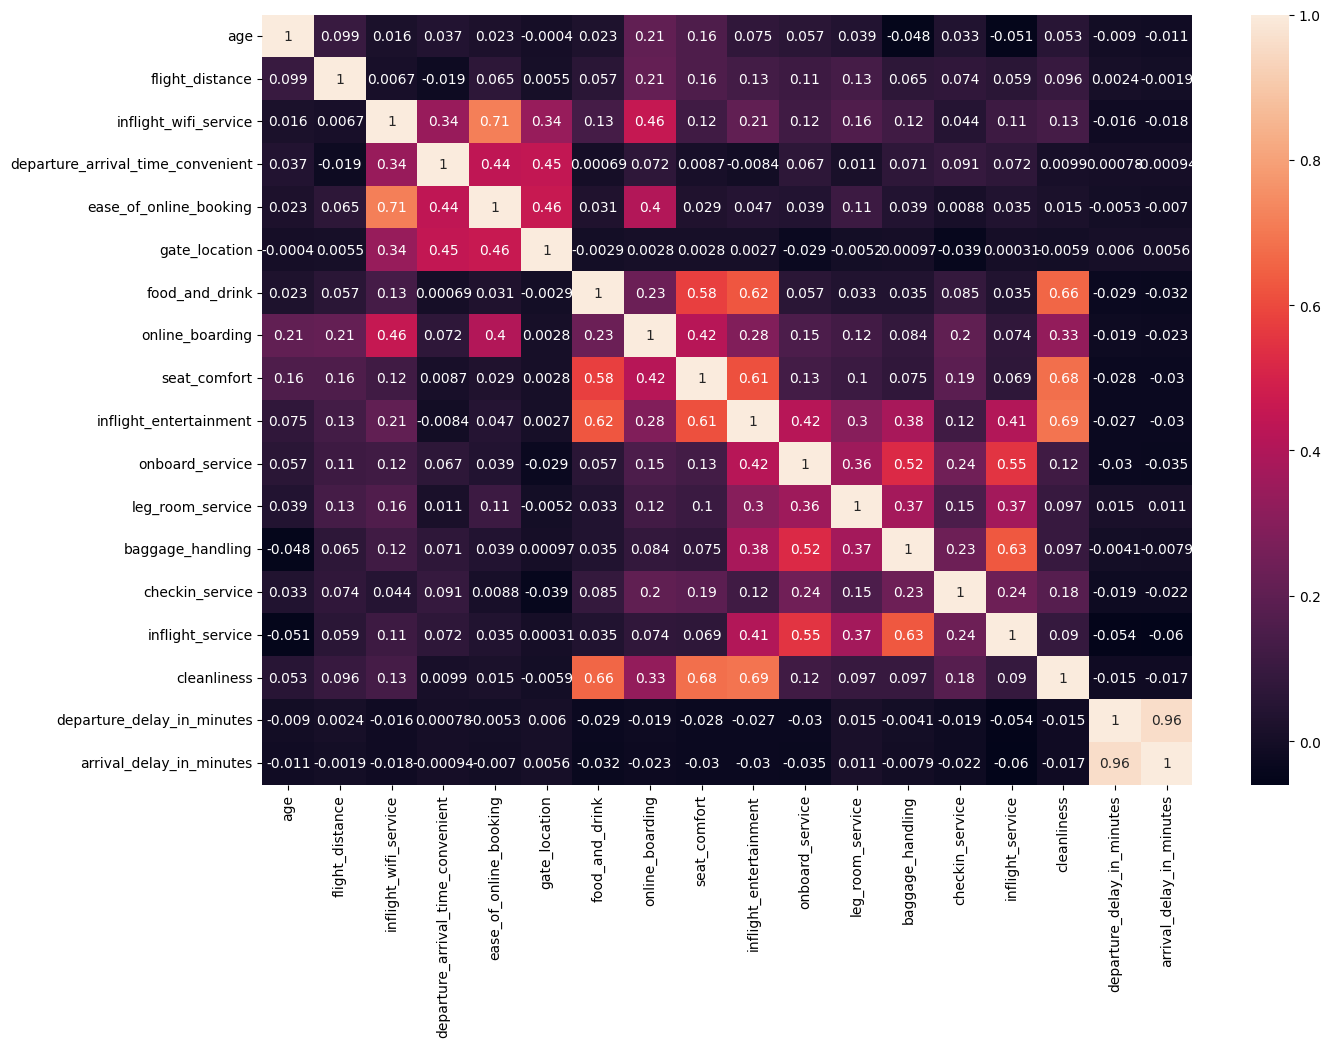

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

You can see that there is a strong correlation between the features 'Departure delay in minutes' and 'Arrival delay in minutes'

Let's build a scatterplot for these features:

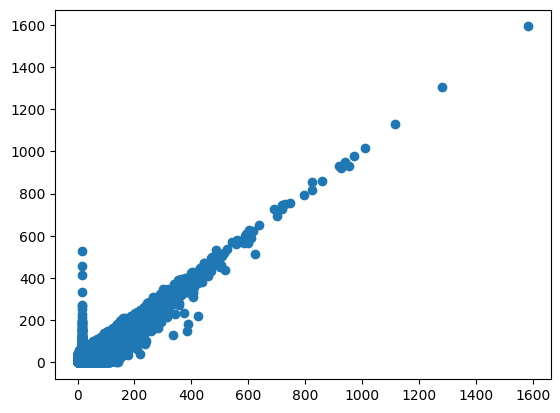

In [ ]:
plt.scatter(x=df['arrival_delay_in_minutes'],y=df['departure_delay_in_minutes'])

In [ ]:
#  sns.pairplot(df)

**Dectection and Removing outliers**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                                    24.0
flight_distance                      1330.0
inflight_wifi_service                   2.0
departure_arrival_time_convenient       2.0
ease_of_online_booking                  2.0
gate_location                           2.0
food_and_drink                          2.0
online_boarding                         2.0
seat_comfort                            3.0
inflight_entertainment                  2.0
onboard_service                         2.0
leg_room_service                        2.0
baggage_handling                        2.0
checkin_service                         1.0
inflight_service                        2.0
cleanliness                             2.0
departure_delay_in_minutes             12.0
arrival_delay_in_minutes               13.0
dtype: float64


<ipython-input-17-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-17-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


<Axes: xlabel='satisfaction', ylabel='age'>

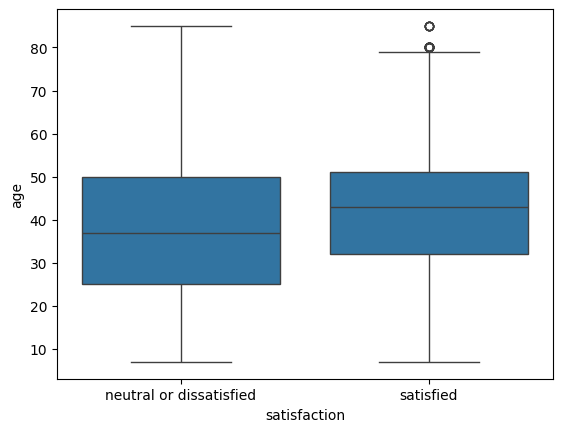

In [ ]:
sns.boxplot(x='satisfaction',y='age',data=df)

<Axes: xlabel='satisfaction', ylabel='flight_distance'>

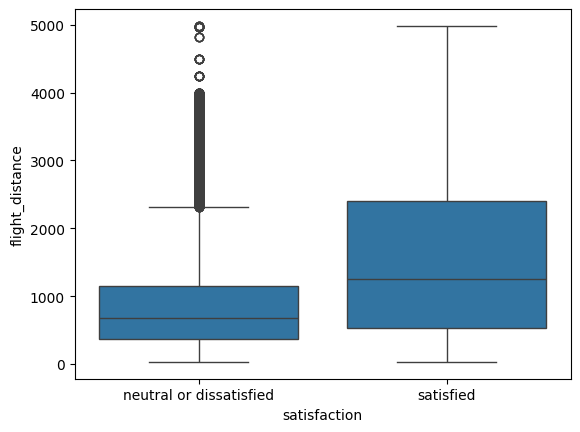

In [ ]:
sns.boxplot(x='satisfaction',y='flight_distance',data=df)

<Axes: xlabel='satisfaction', ylabel='departure_delay_in_minutes'>

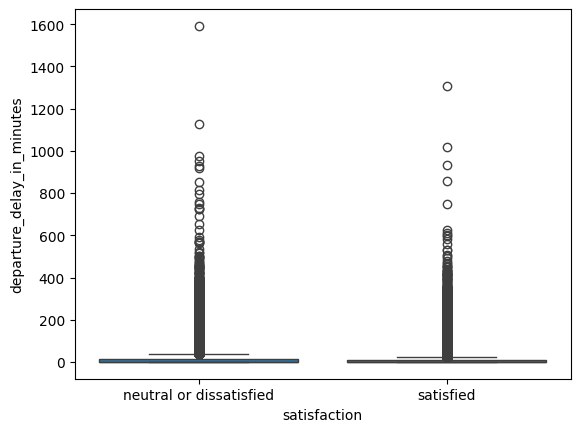

In [ ]:
sns.boxplot(x='satisfaction',y='departure_delay_in_minutes',data=df)

<Axes: xlabel='satisfaction', ylabel='arrival_delay_in_minutes'>

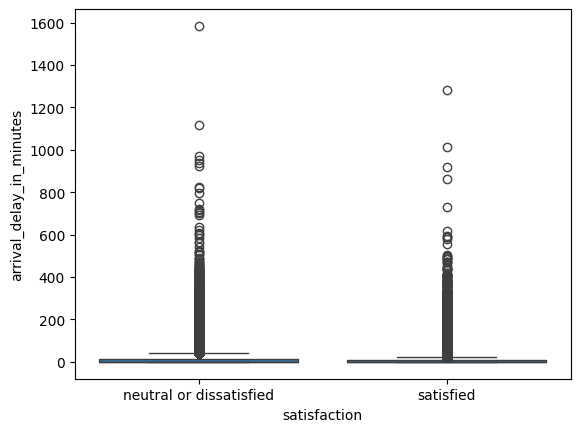

In [ ]:
sns.boxplot(x='satisfaction',y='arrival_delay_in_minutes',data=df)

In [ ]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-22-6a07472a271a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]


(93648, 23)

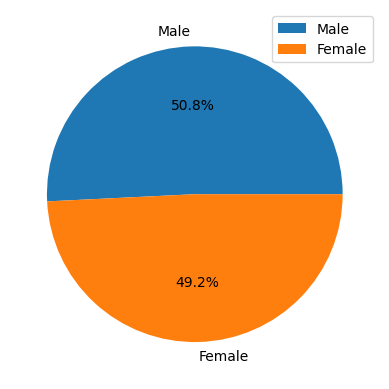

In [ ]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.legend(loc='upper right')


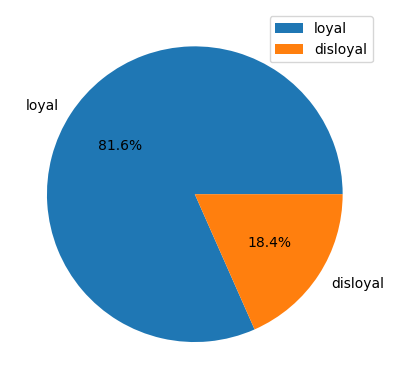

In [ ]:
plt.pie(df['customer_type'].value_counts(),labels=['loyal','disloyal'],autopct='%1.1f%%')
plt.legend(loc='upper right')


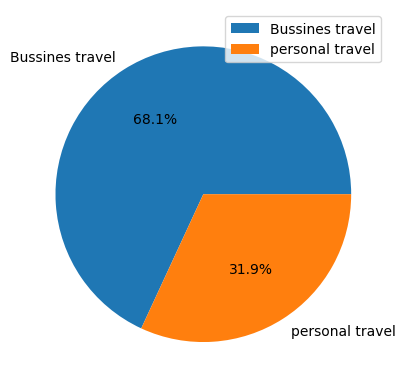

In [ ]:
plt.pie(df['type_of_travel'].value_counts(),labels=['Bussines travel','personal travel'],autopct='%1.1f%%')
plt.legend(loc='upper right')


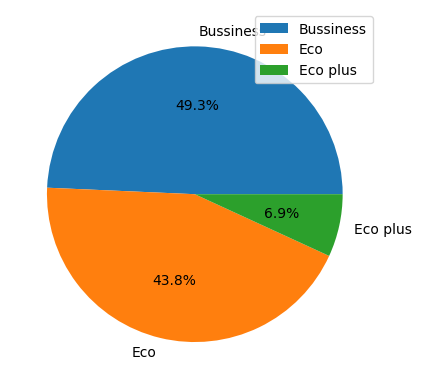

In [ ]:
plt.pie(df['customer_class'].value_counts(),labels=['Bussiness','Eco','Eco plus'],autopct='%1.1f%%')
plt.legend(loc='upper right')


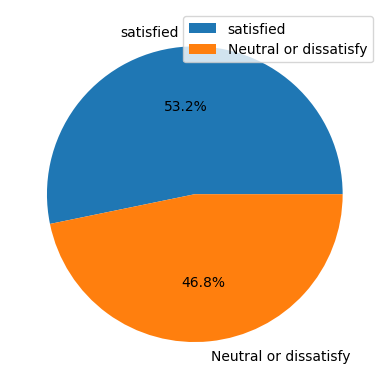

In [ ]:
plt.pie(df['satisfaction'].value_counts(),labels=['satisfied','Neutral or dissatisfy'],autopct='%1.1f%%')
plt.legend(loc='upper right')

**Handling Categorical Features**

Many columns contain categorical values but are of type 'object' or 'int64'.

using the method getdummies

In [ ]:
df1=pd.get_dummies(df[['Gender', 'customer_type','type_of_travel','customer_class','satisfaction']],drop_first=True)
df1

,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,1,0,1,0,1,0
2,0,0,0,0,0,1
4,1,0,0,0,0,1
5,0,0,1,1,0,0
6,1,0,1,1,0,0
...,...,...,...,...,...,...
129874,0,1,0,1,0,0
129875,1,1,0,0,0,0
129876,1,0,0,0,0,1
129877,0,0,1,1,0,0


In [ ]:
df2=pd.concat([df,df1],axis=1)
df2

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,25,18.0,neutral or dissatisfied,1,0,1,0,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,0,0.0,satisfied,0,0,0,0,0,1
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,0,0.0,satisfied,1,0,0,0,0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,0,0.0,neutral or dissatisfied,0,0,1,1,0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,9,23.0,neutral or dissatisfied,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,disloyal Customer,36,Business travel,Eco,432,1,5,1,3,...,4,0,0.0,neutral or dissatisfied,0,1,0,1,0,0
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,0,0.0,neutral or dissatisfied,1,1,0,0,0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,0,0.0,satisfied,1,0,0,0,0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,0,0.0,neutral or dissatisfied,0,0,1,1,0,0


In [ ]:
df3=df2.drop(['Gender', 'customer_type','type_of_travel','customer_class','satisfaction'],axis=1)
df3

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1
5,26,1180,3,4,2,1,1,2,1,1,...,4,1,0,0.0,0,0,1,1,0,0
6,47,1276,2,4,2,3,2,2,2,2,...,5,2,9,23.0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,36,432,1,5,1,3,4,1,4,4,...,3,4,0,0.0,0,1,0,1,0,0
129875,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0.0,1,1,0,0,0,0
129876,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0.0,1,0,0,0,0,1
129877,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0.0,0,0,1,1,0,0


**Feature Selection**

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest
x=df3.drop(['satisfaction_satisfied'],axis=1)
y=df3['satisfaction_satisfied']
chi=chi2(x,y)
chi
selector=SelectKBest(chi2, k=10)
selector.fit(x,y)
x_new = selector.transform(x)
print(x.columns[selector.get_support(indices=True)])

Index(['age', 'flight_distance', 'inflight_wifi_service', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'leg_room_service',
       'arrival_delay_in_minutes', 'type_of_travel_Personal Travel',
       'customer_class_Eco'],
      dtype='object')


In [ ]:
x=['age', 'flight_distance', 'inflight_wifi_service', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'leg_room_service',
       'arrival_delay_in_minutes', 'type_of_travel_Personal Travel',
       'customer_class_Eco']
y=['satisfaction_satisfied']


In [ ]:
x1=df3[x].values
x1

array([[1.300e+01, 4.600e+02, 3.000e+00, ..., 1.800e+01, 1.000e+00,
        0.000e+00],
       [2.600e+01, 1.142e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.100e+01, 2.140e+02, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.300e+01, 6.460e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.700e+01, 8.280e+02, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.400e+01, 1.127e+03, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
y1=df3[y].values
y1

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=uint8)

splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)


In [ ]:
x_train

array([[5.500e+01, 1.250e+02, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.100e+01, 1.440e+03, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.100e+01, 1.744e+03, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [3.300e+01, 1.436e+03, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.100e+01, 3.324e+03, 4.000e+00, ..., 1.700e+01, 0.000e+00,
        0.000e+00],
       [2.000e+01, 1.890e+02, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [ ]:
x_test

array([[5.700e+01, 3.103e+03, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.700e+01, 2.360e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.300e+01, 3.149e+03, 1.000e+00, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.100e+01, 3.030e+02, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [3.200e+01, 4.590e+02, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.600e+01, 1.188e+03, 1.000e+00, ..., 1.300e+01, 0.000e+00,
        1.000e+00]])

In [ ]:
y_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=uint8)

In [ ]:
y_test

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

Noramlisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train


array([[ 1.02912799, -1.10295022, -0.55496967, ..., -0.52314442,
        -0.68640412, -0.88568329],
       [-1.22325431,  0.3124933 ,  1.66797228, ..., -0.52314442,
        -0.68640412,  1.12907177],
       [ 0.76414184,  0.63971371,  0.18601098, ..., -0.52314442,
         1.45686772,  1.12907177],
       ...,
       [-0.42829585,  0.30818777,  0.18601098, ..., -0.52314442,
        -0.68640412, -0.88568329],
       [ 0.76414184,  2.3403987 ,  0.92699163, ...,  1.9871312 ,
        -0.68640412, -0.88568329],
       [-1.28950085, -1.03406171,  0.18601098, ..., -0.37548115,
        -0.68640412,  1.12907177]])

In [ ]:
x_test

array([[ 1.14660414,  2.10313472,  0.92279701, ..., -0.51797043,
        -0.6796961 , -0.87888758],
       [-0.17223273, -0.97687033, -1.30643618, ..., -0.51797043,
        -0.6796961 , -0.87888758],
       [ 0.88283677,  2.15255231, -1.30643618, ..., -0.07121595,
        -0.6796961 , -0.87888758],
       ...,
       [ 1.41037152, -0.90489253,  0.17971928, ..., -0.51797043,
         1.47124576,  1.13780195],
       [-0.50194194, -0.73730244, -1.30643618, ..., -0.51797043,
         1.47124576,  1.13780195],
       [-0.897593  ,  0.04585894, -1.30643618, ...,  1.41796562,
        -0.6796961 ,  1.13780195]])

In [ ]:
x_train

array([[ 1.02912799, -1.10295022, -0.55496967, ..., -0.52314442,
        -0.68640412, -0.88568329],
       [-1.22325431,  0.3124933 ,  1.66797228, ..., -0.52314442,
        -0.68640412,  1.12907177],
       [ 0.76414184,  0.63971371,  0.18601098, ..., -0.52314442,
         1.45686772,  1.12907177],
       ...,
       [-0.42829585,  0.30818777,  0.18601098, ..., -0.52314442,
        -0.68640412, -0.88568329],
       [ 0.76414184,  2.3403987 ,  0.92699163, ...,  1.9871312 ,
        -0.68640412, -0.88568329],
       [-1.28950085, -1.03406171,  0.18601098, ..., -0.37548115,
        -0.68640412,  1.12907177]])

**Model creation**


****

using classification algorithms K-nearest neighbhor,Naive-bayes,support vector machine,decision Tree,Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=GaussianNB()
s_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='gini')
lst_model=[k_model,n_model,s_model,d_model,r_model]


**Perfomance Evaluation**

model name is KNeighborsClassifier(n_neighbors=7)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**********
[[14098   858]
 [ 1268 11871]]
*********
accuracy_score 0.9243281722726464
*******
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14956
           1       0.93      0.90      0.92     13139

    accuracy                           0.92     28095
   macro avg       0.93      0.92      0.92     28095
weighted avg       0.92      0.92      0.92     28095

***********
model name is GaussianNB()
**********
[[12772  2184]
 [ 2097 11042]]
*********
accuracy_score 0.8476241324079018
*******
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     14956
           1       0.83      0.84      0.84     13139

    accuracy                           0.85     28095
   macro avg       0.85      0.85      0.85     28095
weighted avg       0.85      0.85      0.85     28095

***********


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model name is SVC()
**********
[[13997   959]
 [ 1037 12102]]
*********
accuracy_score 0.9289553301299164
*******
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14956
           1       0.93      0.92      0.92     13139

    accuracy                           0.93     28095
   macro avg       0.93      0.93      0.93     28095
weighted avg       0.93      0.93      0.93     28095

***********
model name is DecisionTreeClassifier(criterion='entropy')
**********
[[13702  1254]
 [ 1193 11946]]
*********
accuracy_score 0.9129026517173874
*******
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     14956
           1       0.91      0.91      0.91     13139

    accuracy                           0.91     28095
   macro avg       0.91      0.91      0.91     28095
weighted avg       0.91      0.91      0.91     28095

***********
model name is RandomForestClassifier()


<ipython-input-52-2f57fffe3879>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


**********
[[14137   819]
 [ 1044 12095]]
*********
accuracy_score 0.9336892685531233
*******
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14956
           1       0.94      0.92      0.93     13139

    accuracy                           0.93     28095
   macro avg       0.93      0.93      0.93     28095
weighted avg       0.93      0.93      0.93     28095

***********


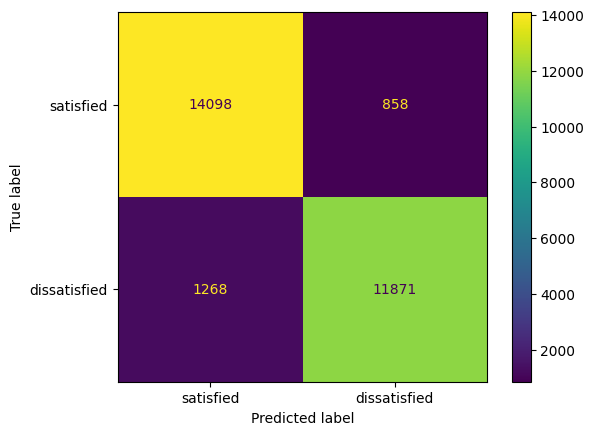

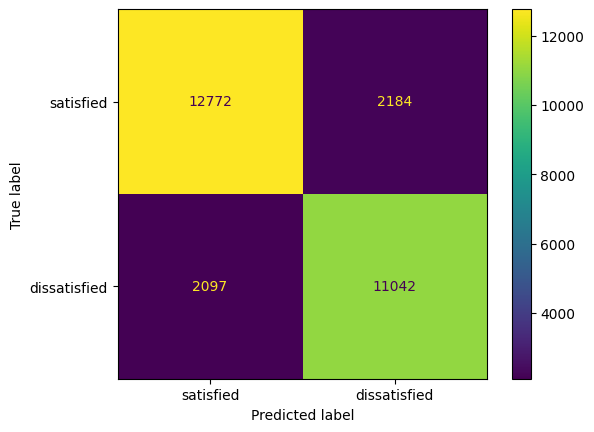

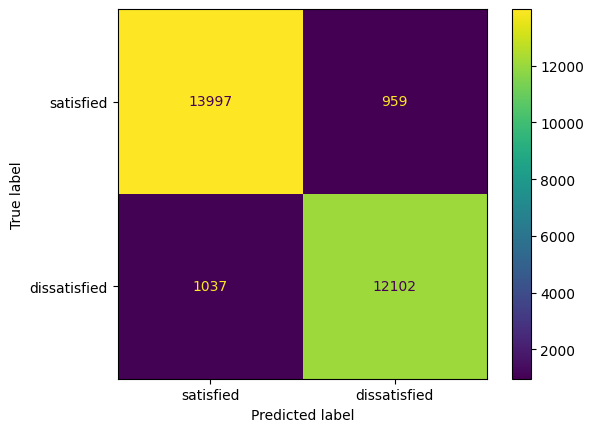

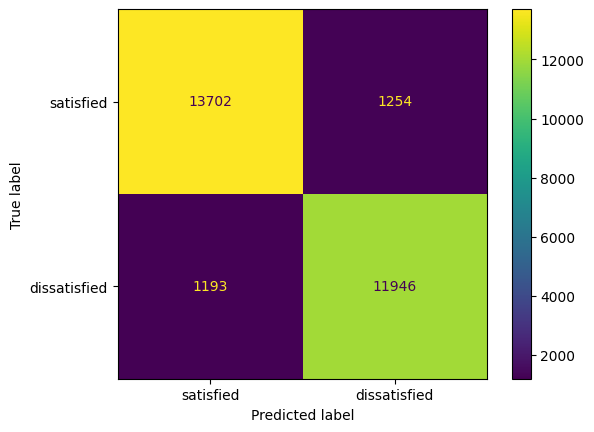

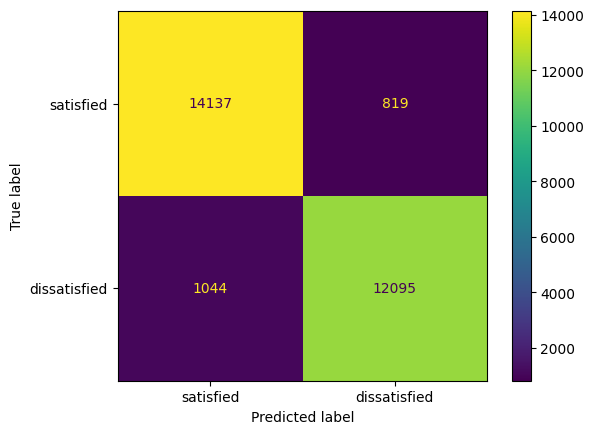

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
for i in lst_model:
  print("model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('**********')
  print(confusion_matrix(y_test,y_pred))
  print('*********')
  print('accuracy_score',accuracy_score(y_test,y_pred))
  print('*******')
  print(classification_report(y_test,y_pred))
  print('***********')
  dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['satisfied','dissatisfied'])
  dis.plot()


**Model improvement**

In [ ]:
from sklearn.model_selection import GridSearchCV
# k_model=KNeighborsClassifier()
# param={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
# gd=GridSearchCV(k_model,param,cv=10,scoring='accuracy')
# gd.fit(x_train,y_train)
# s_model=GaussianNB()
# param={'var_smoothing':[1e-11, 1e-10, 1e-9]}
# gd=GridSearchCV(s_model,param,cv=10,scoring='accuracy')
# gd.fit(x_train,y_train)
r_model=RandomForestClassifier()
param={'criterion':['gini','entropy'],'n_estimators':[50,60,70,80,90,100]}
gd=GridSearchCV(r_model,param,cv=10,scoring='accuracy')
gd.fit(x_train,y_train)

In [ ]:
print(gd.best_params_)

{'criterion': 'entropy', 'n_estimators': 70}


In [ ]:
# knn=KNeighborsClassifier(n_neighbors=9, weights='uniform')
# knn.fit(x_train,y_train)
# y_predict=knn.predict(x_test)
# y_predict
# nv=GaussianNB(var_smoothing=1e-11)
# nv.fit(x_train,y_train)
# y_predict=nv.predict(x_test)
# y_predict
model=RandomForestClassifier(criterion='gini',n_estimators=50)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict

<ipython-input-65-1fa2fb3a10f5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[14164   792]
 [ 1051 12088]]
0.9344011389927033
